In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

<ipython-input-3-7748dbf53469>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


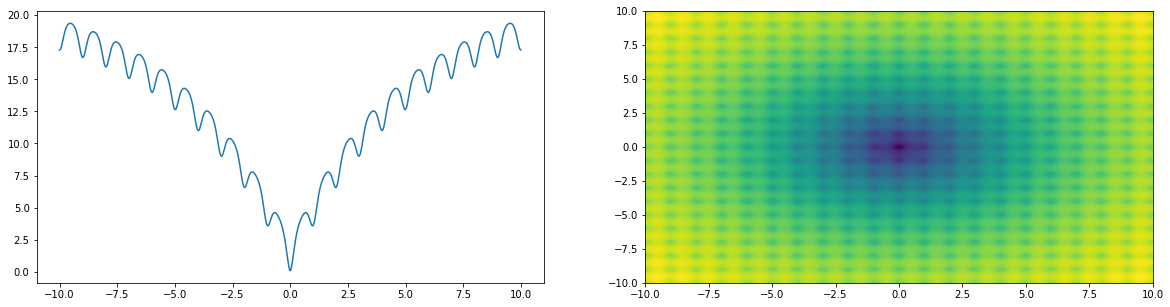

<ipython-input-3-7748dbf53469>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


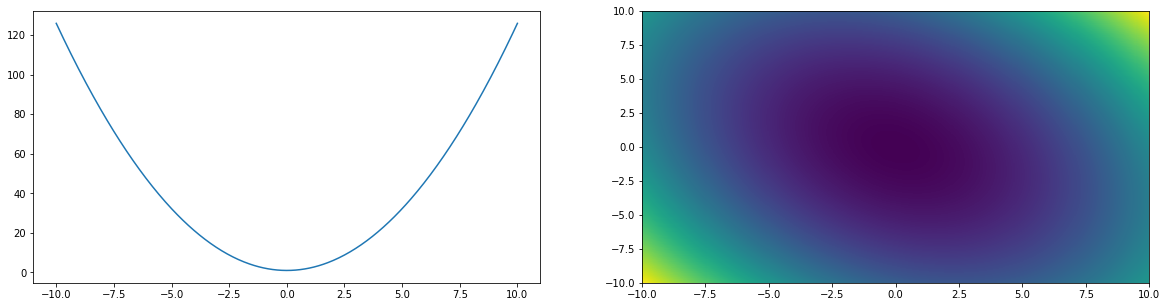

In [3]:
x = torch.linspace(-10, 10, 500)
y = torch.linspace(-10, 10, 500)
# x = torch.linspace(-500, 500, 1000)
# y = torch.linspace(-500, 500, 1000)
xm, ym = torch.meshgrid(x, y)

# for optim_fn in [ackley, rastrigin, myrastrigin, xin_she_yang, schwefel, zakharov, schaffer]:
for optim_fn in [ackley, zakharov]:
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(x, optim_fn(x[:, None]))
    plt.subplot(122)
    z = torch.stack([xm, ym], dim=-1)
    z = optim_fn(z)
    plt.pcolormesh(x, y, z)
    plt.show()
    

torch.Size([2])
torch.Size([12, 10000, 2])
torch.Size([12, 10000])


<ipython-input-3-4adb37bbc9e8>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xm, ym, z)


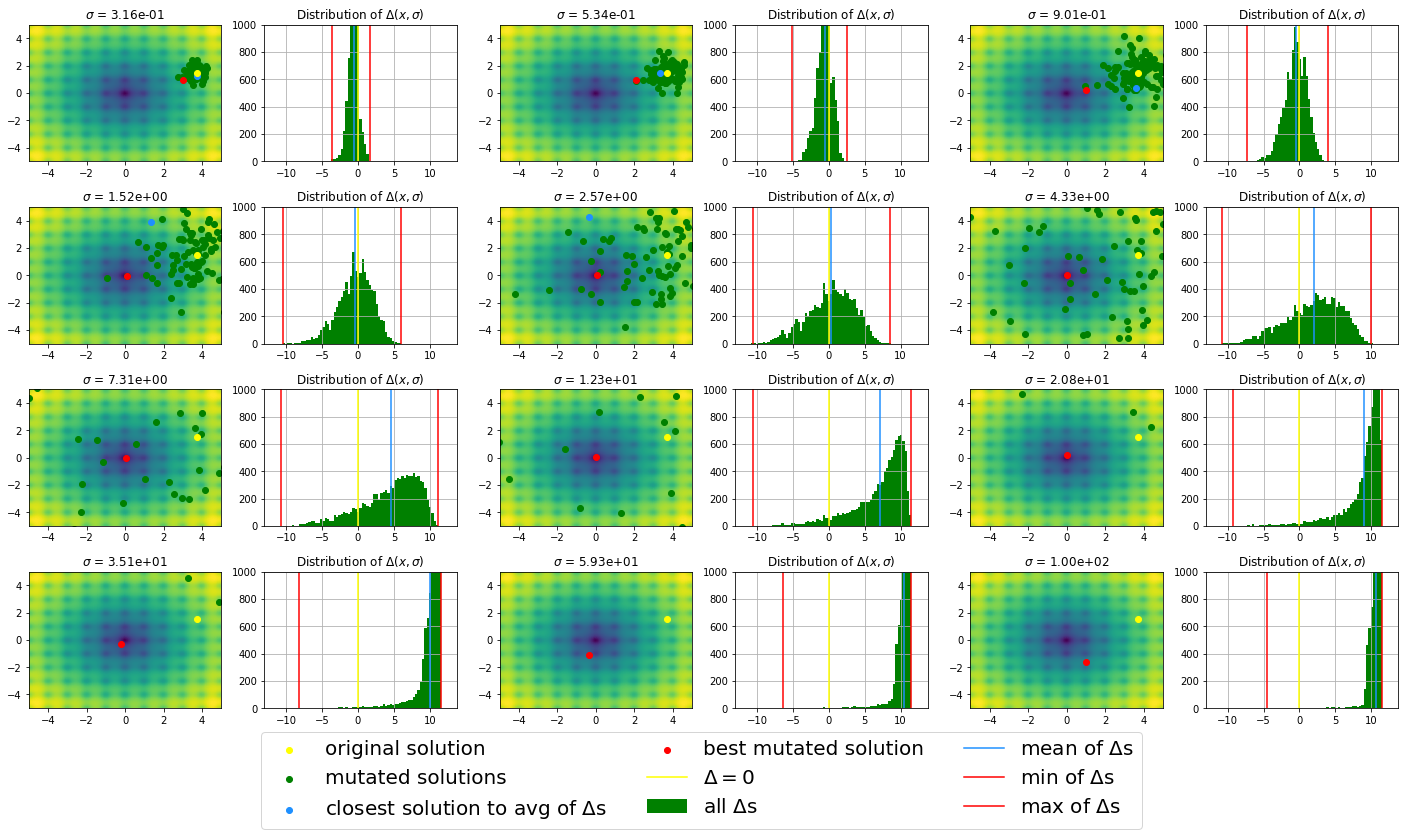

In [3]:
def viz_temp(n_rows, n_cols, log_mr_low, log_mr_high, optim_fn):
    x = torch.linspace(-5, 5, 500)
    y = torch.linspace(-5, 5, 500)
    xm, ym = torch.meshgrid(x, y)
    z = torch.stack([xm, ym], dim=-1)
    z = optim_fn(z)
    
    mrs = torch.logspace(log_mr_low, log_mr_high, n_rows*n_cols)
#     x = torch.tensor([5., 5.])
    x = torch.randn(2)
    x = x/x.norm()*4.
    
    n_samples = 10000
    n_samples_display = 100
    
    x, xmut, fit_diff = get_mrs_fitness(x, mrs, optim_fn, n_samples=n_samples)
    
    print(x.shape)
    print(xmut.shape)
    print(fit_diff.shape)
#     best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]

    fig, axs = plt.subplots(n_rows, n_cols*2, figsize=(20, 12))
    ax = fig.add_subplot(111)
    viz.empty_ax(ax)
    
    i = 0
    for i_row in range(n_rows):
        for i_col in range(0, n_cols*2, 2):
            best_xmut = xmut[i, fit_diff[i].argmin(dim=-1)]
            avg_xmut = xmut[i, (fit_diff[i]-fit_diff[i].mean()).abs().argmin(dim=-1)]
            
            plt.sca(axs[i_row, i_col])
            plt.title(f'$\sigma$ = {mrs[i]:.2e}')
            plt.pcolormesh(xm, ym, z)
            
            smp_rate = n_samples//n_samples_display
            plt.scatter(*xmut[i].numpy()[::smp_rate].T, c='green', label='mutated solutions')
            plt.scatter(*best_xmut.numpy(), c='r', label='best mutated solution')
            plt.scatter(*avg_xmut.numpy(), c='dodgerblue', label='closest solution to avg of $\Delta$s')
            plt.scatter(*x.numpy(), c='yellow', label='original solution')
            
            plt.xlim(xm.min(), xm.max())
            plt.ylim(ym.min(), ym.max())
#             if i_row==n_rows-1 and i_col==n_cols//2*2:
#                 plt.legend(fontsize=10, bbox_to_anchor=(.05, -.1), loc='upper left')
            
            plt.sca(axs[i_row, i_col+1])
            plt.title('Distribution of $\Delta(x, \sigma)$')
            bins = np.linspace(fit_diff.min(), fit_diff.max(), 70)
            plt.hist(fit_diff[i].numpy(), bins=bins, color='green', label='all $\Delta$s')
            plt.axvline(0, c='yellow', label='$\Delta=0$')
            plt.axvline(fit_diff[i].min().numpy(), c='r', label='min of $\Delta$s')
            plt.axvline(fit_diff[i].max().numpy(), c='r', label='max of $\Delta$s')
            plt.axvline(fit_diff[i].mean().numpy(), c='dodgerblue', label='mean of $\Delta$s')
            r = fit_diff.max()-fit_diff.min()
            plt.xlim(fit_diff.min()-.1*r, fit_diff.max()+.1*r)
            plt.ylim(0, 1000)
            i+=1
            plt.grid()
            
#             if i_row==n_rows-1 and i_col==n_cols//2*2:
#                 plt.legend(fontsize=10, bbox_to_anchor=(.25, -.1), loc='upper left')

    h, l = [], []
    handles, labels = axs[-1, -2].get_legend_handles_labels()
    h.extend(handles); l.extend(labels)
    handles, labels = axs[-1, -1].get_legend_handles_labels()
    h.extend(handles); l.extend(labels)
    h = np.array(h)[np.array([3, 0, 2, 1, 4, 8, 7, 5, 6])]
    l = np.array(l)[np.array([3, 0, 2, 1, 4, 8, 7, 5, 6])]
    ax.legend(h, l, fontsize=20, ncol=3, bbox_to_anchor=(.82, -.02),)

    plt.tight_layout()

do_seed(1)
viz_temp(4, 3, -.5, 2., ackley)
plt.savefig('results/landscape_mut.png', dpi=300)
plt.show()


# Sample Mutation Rates Delta Fitness Distributions

In [4]:
mrs = torch.logspace(-1, 1.5, 16)
x = torch.randn(10000, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
print(fit_diff.shape)
best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]

torch.Size([16, 10000])


In [5]:
fit_diff.min(), fit_diff.max()

(tensor(-7.6916), tensor(21.9599))

In [6]:
mrs = torch.logspace(-1, 1.5, 4)
x = torch.randn(10000, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
print(fit_diff.shape)
best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]

torch.Size([4, 10000])


<ipython-input-7-341861f6499f>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


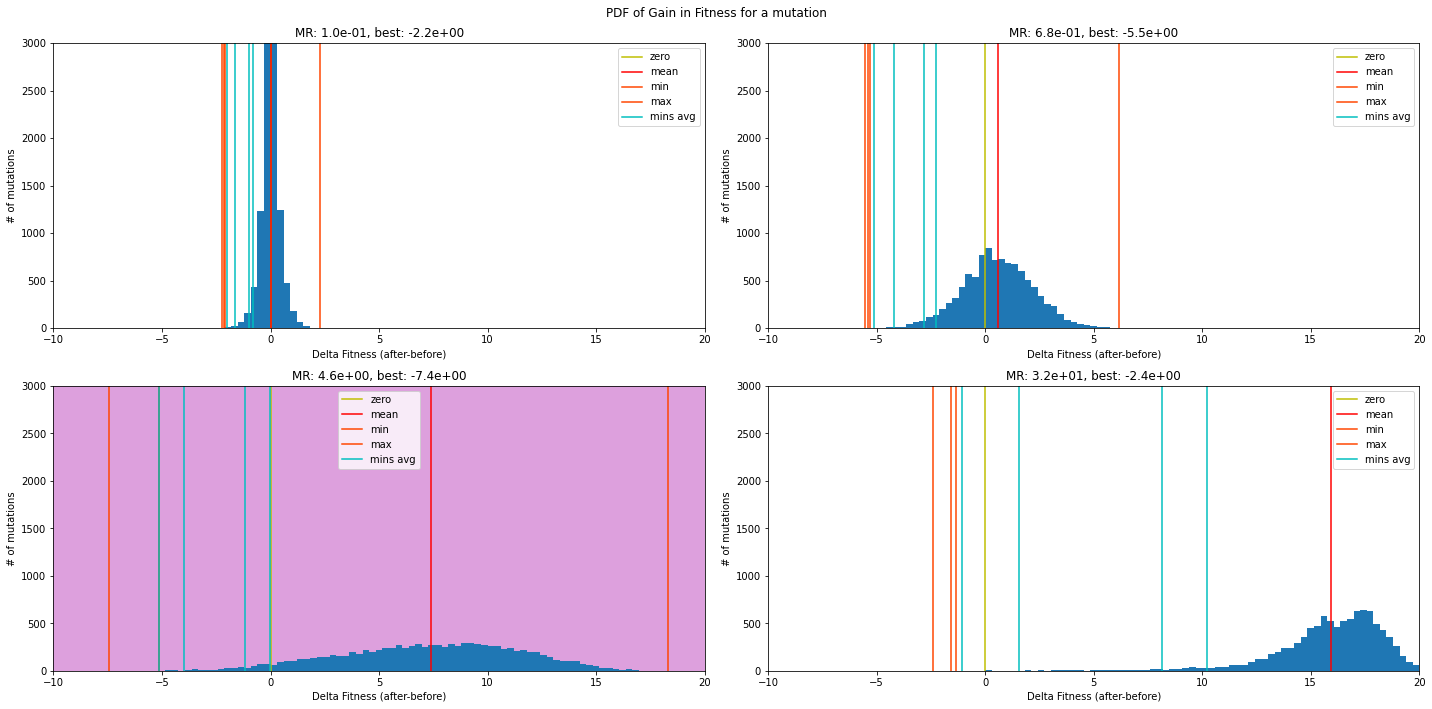

In [7]:
fig, axs = viz_mrs_fit_hists(mrs, x, xmut, fit_diff, (2,2))
axs.flatten()[fit_diff.min(dim=-1).values.argmin()].set_facecolor('plum')
fig.show()

# Mutation Rate vs Delta Fitness Distributions

In [8]:
def calc_fd_bins_ns(mrs, fit_diff, fd_bins):
    ns = []
    for i, mr in enumerate(mrs):
        fd = fit_diff[i]
    #     n, _, chart = plt.hist(fd.cpu().numpy(), bins=bins)
        n, _  = np.histogram(fd.cpu().numpy(), bins=fd_bins)
        ns.append(n)
    ns = np.stack(ns)
    return ns
def calc_fd_bins_ns_with_pop(x, optim_fn, 
                             log_mr_low=-1, log_mr_high=1.5, n_mrs=100,
                             fd_bin_low=-10, fd_bin_high=20, n_fd_bins=100):
    mrs = torch.logspace(log_mr_low, log_mr_high, n_mrs)
    x, xmut, fit_diff = get_mrs_fitness(x, mrs, optim_fn)
    best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]
    
    fd_bins = np.linspace(fd_bin_low, fd_bin_high, n_fd_bins+1)
    ns = calc_fd_bins_ns(mrs, fit_diff, fd_bins)
    fd_bins = np.linspace(fd_bin_low, fd_bin_high, n_fd_bins)
    return mrs, fd_bins, ns, fit_diff
"""
WHEN YOU'RE BACK: get these shapes to work out and batch everything
then we can run this for avg of mins case, etc.
"""

"\nWHEN YOU'RE BACK: get these shapes to work out and batch everything\nthen we can run this for avg of mins case, etc.\n"

In [9]:
x = torch.randn(50, 1000, 2)
mrs, fd_bins, ns, fit_diff = calc_fd_bins_ns_with_pop(x, ackley, 
                             log_mr_low=-1, log_mr_high=1.5, n_mrs=100, 
                             fd_bin_low=-10, fd_bin_high=20, n_fd_bins=100)
mrs.shape, fd_bins.shape, ns.shape, fit_diff.shape

(torch.Size([100]), (100,), (100, 100), torch.Size([100, 50, 1000]))

In [10]:
mrs = torch.logspace(-1, 1.5, 100)
x = torch.randn(10000, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
print(fit_diff.shape)
best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]

torch.Size([100, 10000])


In [11]:
fd_bins = np.linspace(-10, 20, 101)
ns = calc_fd_bins_ns(mrs, fit_diff, fd_bins)
fd_bins = np.linspace(-10, 20, 100)
# fd_bins = np.linspace(-50, 100, 101)
# ns = calc_fd_bins_ns(fit_diff, fd_bins)
# fd_bins = np.linspace(-50, 100, 100)

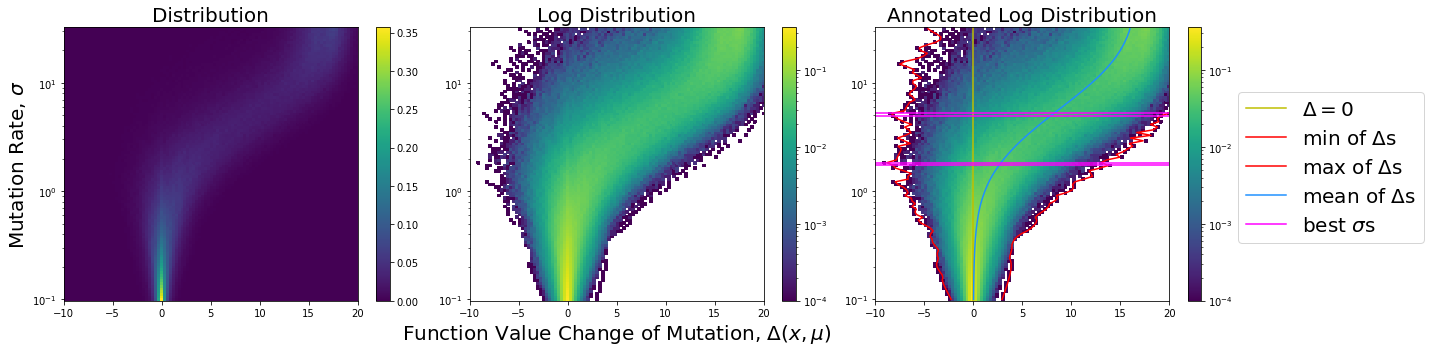

In [12]:
fig, axs = viz_mrs_performance(mrs, fd_bins, ns, fit_diff, True)
plt.savefig('results/curve_template.png', dpi=300)
plt.show()

In [13]:

kwargs = np.empty((4, 3), dtype=object)
for i, optim_fn in enumerate([ackley, rastrigin, sphere, lin_fn]):
    for ii, n_dim in enumerate([2, 10, 100]):
        kwargs[i, ii] = {
            'optim_fn': optim_fn,
            'log_mr_low':-1.3, 'log_mr_high':1.5, 'n_mrs':100, 
            'fd_bin_low':-10, 'fd_bin_high':20, 'n_fd_bins':100
        }
kwargs[0, 1]['log_mr_high'] = 1
kwargs[0, 2]['log_mr_high'] = .3


kwargs[1, 0]['log_mr_high'] = 2.
kwargs[1, 1]['log_mr_high'] = 1.2
kwargs[1, 2]['log_mr_high'] = .5
        
    
kwargs[2, 1]['log_mr_high'] = .7
kwargs[2, 2]['log_mr_high'] = 0
    
# for ii, n_dim in enumerate([2, 10, 100]):
#         'fd_bin_low':-50, 'fd_bin_high':100, 'n_fd_bins':100

/Users/akarshkumar0101/evolved-neuroevolution/analysis.py:93: RuntimeWarning: invalid value encountered in true_divide
  plt.pcolormesh(a, b, ns.T/ns.sum(axis=-1), shading='auto',
/Users/akarshkumar0101/evolved-neuroevolution/analysis.py:93: RuntimeWarning: invalid value encountered in true_divide
  plt.pcolormesh(a, b, ns.T/ns.sum(axis=-1), shading='auto',
/Users/akarshkumar0101/evolved-neuroevolution/analysis.py:93: RuntimeWarning: invalid value encountered in true_divide
  plt.pcolormesh(a, b, ns.T/ns.sum(axis=-1), shading='auto',
/Users/akarshkumar0101/evolved-neuroevolution/analysis.py:93: RuntimeWarning: invalid value encountered in true_divide
  plt.pcolormesh(a, b, ns.T/ns.sum(axis=-1), shading='auto',


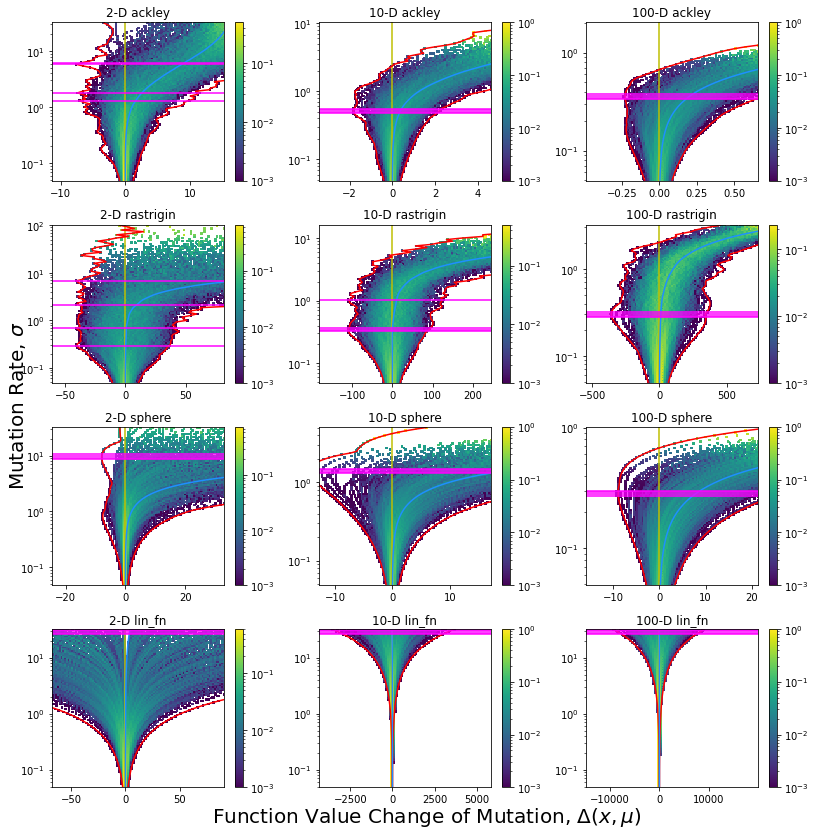

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12), facecolor='white')
ax = fig.add_subplot(111)
# ax.patch.set_visible(True)
ax.patch.set_alpha(0.0)
# ax.axis('off')
# ax.set_xticks([]); ax.set_yticks([])
ax.spines['top'].set_color('none'); ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none'); ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.tick_params(labelcolor=[0.,0.,0.,0.], length=0)



for i, optim_fn in enumerate([ackley, rastrigin, sphere, lin_fn]):
    for ii, n_dim in enumerate([2, 10, 100]):
        x = torch.randn(1000, n_dim)
        x, xmut, fit_diff = get_mrs_fitness(x, mrs, optim_fn)
        a = fit_diff.min().abs().item()
        kwargs[i, ii]['fd_bin_low']  = -1.5*a
        kwargs[i, ii]['fd_bin_high'] = +2.0*a
        
        mrs, fd_bins, ns, fit_diff = calc_fd_bins_ns_with_pop(x, **kwargs[i, ii])
        plt.sca(axs[i, ii])
        draw_mrs_performance(mrs, fd_bins, ns, fit_diff)
        plt.legend().remove()
        plt.title(f'{n_dim}-D {optim_fn.__name__}')

plt.sca(ax)
plt.ylabel('Mutation Rate, $\sigma$', fontsize=20)
plt.sca(ax)
plt.xlabel('Function Value Change of Mutation, $\Delta(x, \mu)$', fontsize=20)

plt.tight_layout()

plt.savefig('results/curves.png', dpi=300)
plt.show()



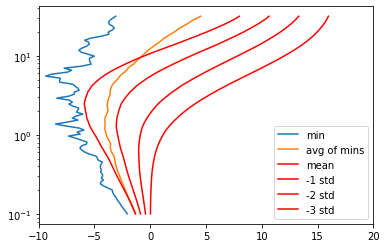

In [36]:
def viz_mr_min_std(mrs, fit_diff):
    a = fit_diff.min(dim=-1).values
    plt.plot(a, mrs, label='min')
    a = fit_diff.reshape(100, 100, 100).min(dim=-1).values.mean(dim=-1)
    plt.plot(a, mrs, label='avg of mins')

    a = fit_diff.mean(dim=-1)
    plt.plot(a, mrs, c='r', label='mean')
    a = fit_diff.mean(dim=-1)-fit_diff.std(dim=-1)
    plt.plot(a, mrs, c='r', label='-1 std')
    a = fit_diff.mean(dim=-1)-2*fit_diff.std(dim=-1)
    plt.plot(a, mrs, c='r', label='-2 std')
    a = fit_diff.mean(dim=-1)-3*fit_diff.std(dim=-1)
    plt.plot(a, mrs, c='r', label='-3 std')

    plt.legend()
    plt.xlim(-10, 20)
    plt.yscale('log')
    return plt.gcf()
viz_mr_min_std(mrs, fit_diff).show()

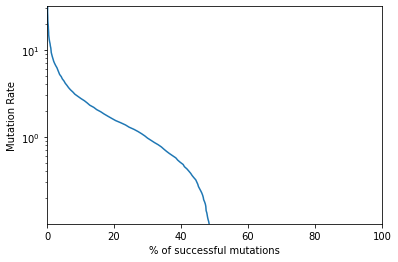

In [24]:
def viz_mr_percent(mrs, x, xmut, fit_diff):
    plt.plot((fit_diff<0).sum(dim=-1)/fit_diff.shape[-1]*100, mrs)
    plt.yscale('log')
    plt.ylabel('Mutation Rate'); plt.xlabel('% of successful mutations')
    plt.ylim(mrs.min(), mrs.max())
    plt.xlim(0,100)
viz_mr_percent(mrs, x, xmut, fit_diff)

Text(0.5, 0, '% successful mutation')

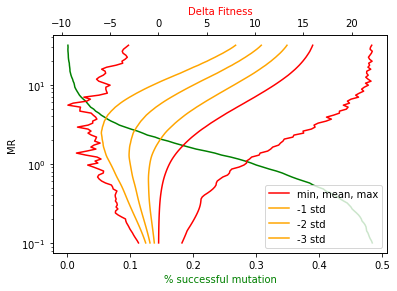

In [47]:
fig, ax1 = plt.subplots()
plt.yscale('log')

ax2 = ax1.twiny()
# a = fit_diff.min(dim=-1).values.min().abs().item()
# ax2.set_xlim(-a, a)
ax1.plot((fit_diff<0).sum(dim=-1)/fit_diff.shape[-1], mrs, c='g')


ax2.plot(fit_diff.mean(dim=-1), mrs, 'r-', label='min, mean, max')
ax2.plot(fit_diff.min(dim=-1).values, mrs, 'r-')
ax2.plot(fit_diff.max(dim=-1).values, mrs, 'r-')

a = fit_diff.mean(dim=-1)-fit_diff.std(dim=-1)
ax2.plot(a, mrs, c='orange', label='-1 std')
a = fit_diff.mean(dim=-1)-2*fit_diff.std(dim=-1)
ax2.plot(a, mrs, c='orange', label='-2 std')
a = fit_diff.mean(dim=-1)-3*fit_diff.std(dim=-1)
ax2.plot(a, mrs, c='orange', label='-3 std')


plt.legend()
ax1.set_ylabel('MR')
ax2.set_xlabel('Delta Fitness', color='r')
ax1.set_xlabel('% successful mutation', color='g')

In [141]:
mrs = torch.logspace(-1, 1.5, 32)
x = torch.randn(10000, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
print(fit_diff.shape)

torch.Size([32, 10000])


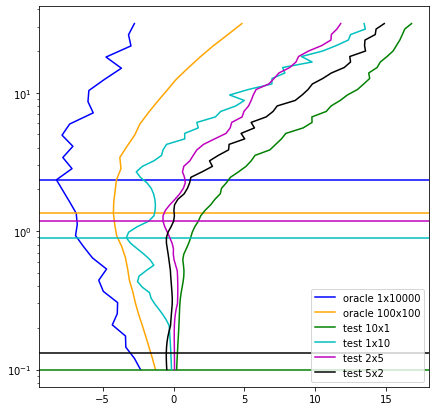

In [142]:

plt.figure(figsize=(7,7))
a = fit_diff.min(dim=-1).values
plt.plot(a, mrs, label='oracle 1x10000', c='b')
plt.axhline(mrs[a.argmin()], c='b')
a = fit_diff.reshape(-1, 100, 100).min(dim=-1).values.mean(dim=-1)
plt.plot(a, mrs, label='oracle 100x100', c='orange')
plt.axhline(mrs[a.argmin()], c='orange')


mrs = torch.logspace(-1, 1.5, 64)
x = torch.randn(10, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
a = fit_diff.reshape(-1, 10, 1).min(dim=-1).values.mean(dim=-1)
plt.plot(a, mrs, label='test 10x1', c='g')
plt.axhline(mrs[a.argmin()], c='g')
x = torch.randn(10, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
a = fit_diff.reshape(-1, 1, 10).min(dim=-1).values.mean(dim=-1)
plt.plot(a, mrs, label='test 1x10', c='c')
plt.axhline(mrs[a.argmin()], c='c')
x = torch.randn(10, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
a = fit_diff.reshape(-1, 2, 5).min(dim=-1).values.mean(dim=-1)
plt.plot(a, mrs, label='test 2x5', c='m')
plt.axhline(mrs[a.argmin()], c='m')
x = torch.randn(10, 2)
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
a = fit_diff.reshape(-1, 5, 2).min(dim=-1).values.mean(dim=-1)
plt.plot(a, mrs, label='test 5x2', c='k')
plt.axhline(mrs[a.argmin()], c='k')

plt.legend()
plt.yscale('log')